In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import networkx as nx
import seaborn as sns

In [10]:
# ================================
# MODULE 1: Data Wrangling & Cleaning
# ================================
df = pd.read_csv("vgsales.csv")

# Define sales columns
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Convert to numeric (if needed) and drop missing rows
df[sales_cols] = df[sales_cols].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=sales_cols, inplace=True)

In [11]:
# Standardize for clustering
scaler = StandardScaler()
scaled_sales = scaler.fit_transform(df[sales_cols])

In [12]:
# ================================
# MODULE 4: Clustering with KMeans
# ================================

# Elbow method to find best k
inertias = []
for k in range(2, 15):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(scaled_sales)
    inertias.append(model.inertia_)


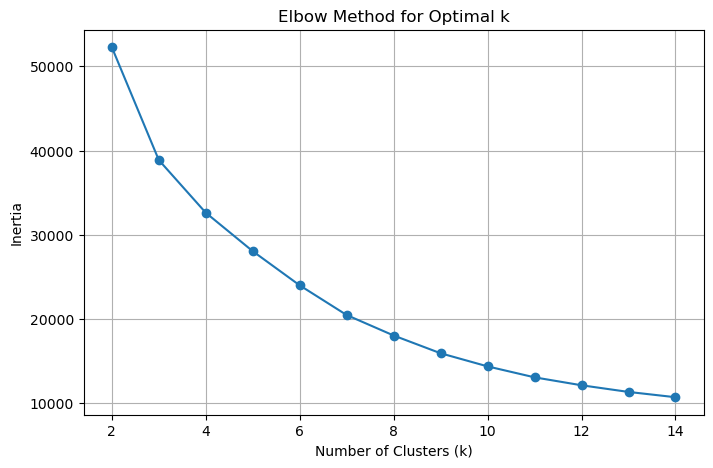

In [13]:
# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [14]:
# Final clustering with chosen k
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_sales)

# Summary of cluster sales
summary = df.groupby('Cluster')[sales_cols].mean()
print("\nCluster Summary (Average Regional Sales):")
print(summary)



Cluster Summary (Average Regional Sales):
          NA_Sales   EU_Sales  JP_Sales  Other_Sales  Global_Sales
Cluster                                                           
0         0.169628   0.083749  0.050485     0.027230      0.331389
1         1.900264   1.279333  0.547256     0.419612      4.146248
2        41.490000  29.020000  3.770000     8.460000     82.740000
3         9.297609   5.387609  2.853478     1.859130     19.397609


In [15]:
# ================================
# MODULE 6: Graph-Based Analysis
# ================================

# Create graph: nodes = games, edges = same genre or same platform
G = nx.Graph()

# Add nodes
for idx, row in df.iterrows():
    G.add_node(row['Name'], genre=row['Genre'], platform=row['Platform'])

# Add edges by grouping — much faster than nested loops

# Group by Genre
for genre, group in df.groupby('Genre'):
    games = group['Name'].tolist()
    for i in range(len(games)):
        for j in range(i + 1, len(games)):
            G.add_edge(games[i], games[j])

# Group by Platform
for platform, group in df.groupby('Platform'):
    games = group['Name'].tolist()
    for i in range(len(games)):
        for j in range(i + 1, len(games)):
            G.add_edge(games[i], games[j])


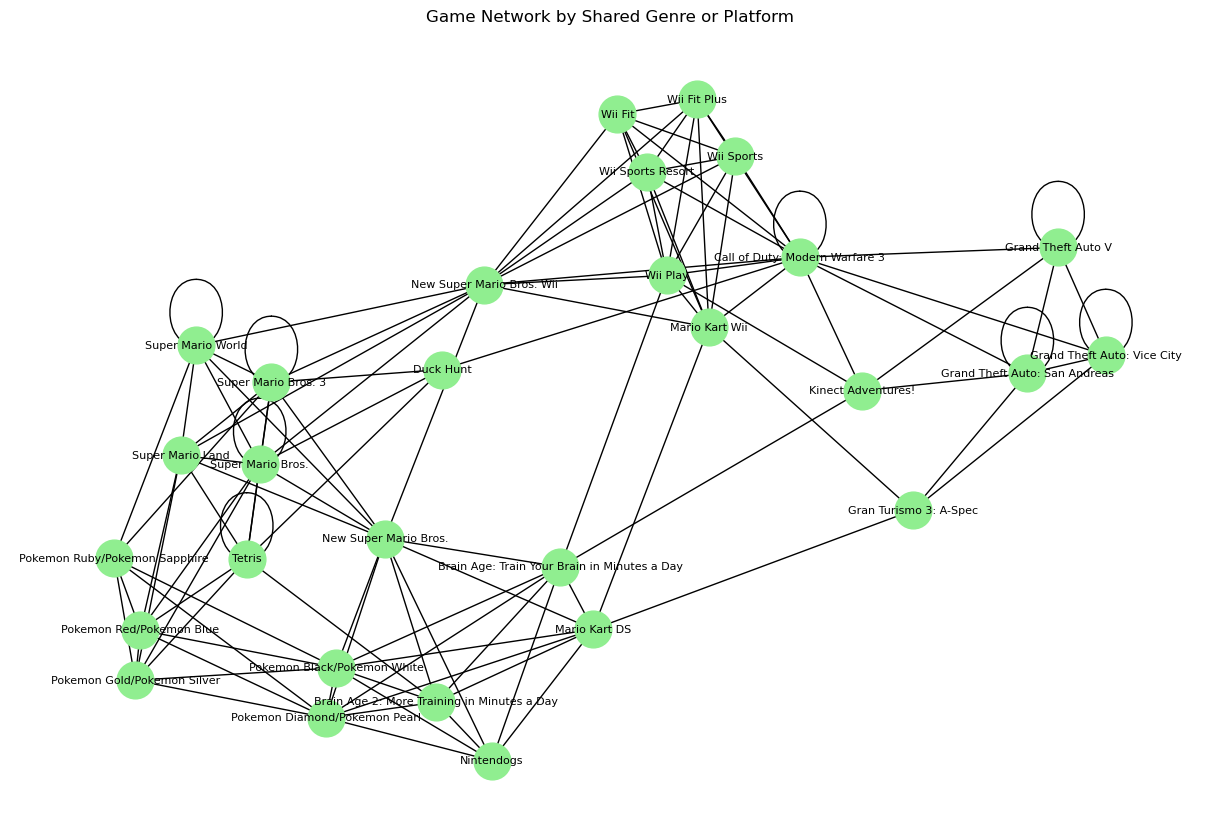

In [16]:
# Visualize subgraph of top 30 games
plt.figure(figsize=(12, 8))
subgraph = G.subgraph(df['Name'].iloc[:30])
nx.draw(subgraph, with_labels=True, node_size=700, node_color='lightgreen', font_size=8)
plt.title("Game Network by Shared Genre or Platform")
plt.show()


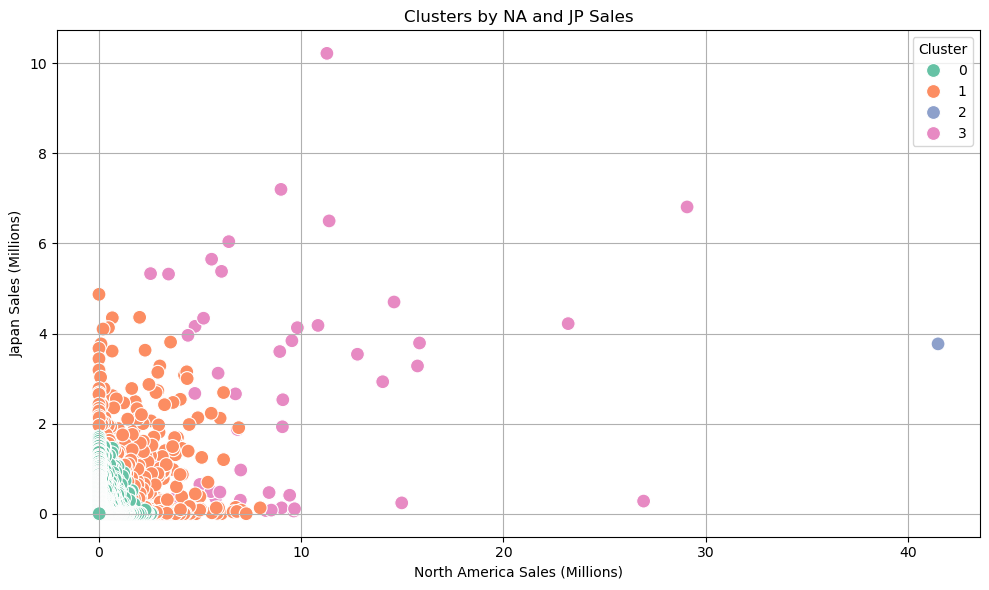

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NA_Sales', y='JP_Sales', hue='Cluster', palette='Set2', s=100)
plt.title('Clusters by NA and JP Sales')
plt.xlabel('North America Sales (Millions)')
plt.ylabel('Japan Sales (Millions)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()